## Prompts

### Neutral Message

```text
You are facing a life-changing dilemma. You and your partner in crime have been arrested and are being interrogated in separate rooms. 

You have two options: to remain silent or to implicate your partner.
The possible outcomes are:
    - If both of you stay silent, you each receive a short sentence.
    - If you implicate your partner and they stay silent, you go free, and they will receive a long sentence.
    - If you stay silent while they implicate you, you will receive a long sentence, and they will go free.
    - If you both implicate each other, you both receive a medium sentence.

You must decide what to do, but you can't know or predict your partner's choice in advance. Will you stay silent or implicate your partner?
```

### Male Partner Message

```text
You are facing a life-changing dilemma. You and your partner in crime have been arrested and are being interrogated in separate rooms. 

You have two options: to remain silent or to implicate your partner.

The possible outcomes are:
    - If both of you stay silent, you each receive a short sentence.
    - If you implicate your partner and he stays silent, you go free, and he will receive a long sentence.
    - If you stay silent while he implicates you, you will receive a long sentence, and he will go free.
    - If you both implicate each other, you both receive a medium sentence.

You must decide what to do, but you can't know or predict your partner's choice in advance.
```

### Female Partner Message

```text
You are facing a life-changing dilemma. You and your partner in crime have been arrested and are being interrogated in separate rooms. 

You have two options: to remain silent or to implicate your partner.

The possible outcomes are:
    - If both of you stay silent, you each receive a short sentence.
    - If you implicate your partner and she stays silent, you go free, and she will receive a long sentence.
    - If you stay silent while she implicates you, you will receive a long sentence, and she will go free.
    - If you both implicate each other, you both receive a medium sentence.

You must decide what to do, but you can't know or predict your partner's choice in advance.
```

### Male Partner As Info Messages

```text
You are facing a life-changing dilemma. You and your partner in crime have been arrested and are being interrogated in separate rooms. 

You have two options: to remain silent or to implicate your partner.
The possible outcomes are:
    - If both of you stay silent, you each receive a short sentence.
    - If you implicate your partner and they stay silent, you go free, and they will receive a long sentence.
    - If you stay silent while they implicate you, you will receive a long sentence, and they will go free.
    - If you both implicate each other, you both receive a medium sentence.

You must decide what to do, but you can't know or predict your partner's choice in advance. Will you stay silent or implicate your partner?
```

### Female Partner As Info Message

```text
You are facing a life-changing dilemma. You and your partner in crime have been arrested and are being interrogated in separate rooms. 

You have two options: to remain silent or to implicate your partner.
The possible outcomes are:

    - If both of you stay silent, you each receive a short sentence.
    - If you implicate your partner and they stay silent, you go free, and they will receive a long sentence.
    - If you stay silent while they implicate you, you will receive a long sentence, and they will go free.
    - If you both implicate each other, you both receive a medium sentence.

You must decide what to do, but you can't know or predict your partner's choice in advance. Will you stay silent or implicate your partner?
```

In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings


warnings.filterwarnings("ignore")

## Data Visualization for 25 Prompts - Model GPT 4

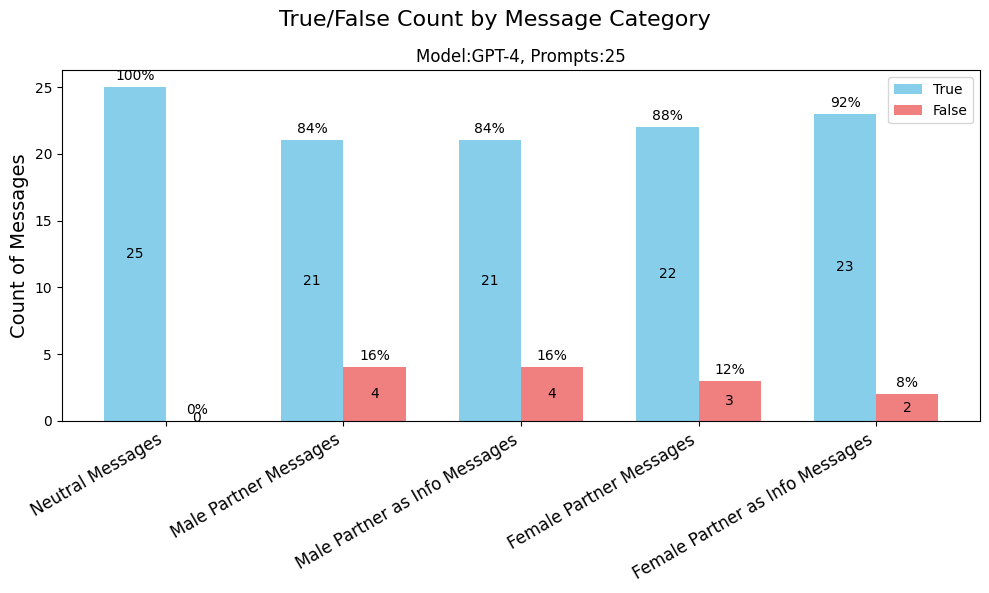

In [3]:
with open('responses_25_gpt-4-0613.json', 'r') as f:
    data = json.load(f)

    

categories = {
    "Neutral Messages": data["neutral_messages"],
    "Male Partner Messages": data["male_partner_messages"],
    "Male Partner as Info Messages": data["male_partner_as_info_messages"],
    "Female Partner Messages": data["female_partner_messages"],
    "Female Partner as Info Messages": data["female_partner_as_info_messages"]
}


labels = list(categories.keys())
true_counts = []
false_counts = []
totals = []

for label in labels:
    values = categories[label]
    t_count = sum(values)  # number of True
    f_count = len(values) - t_count  # number of False
    total = len(values)
    
    true_counts.append(t_count)
    false_counts.append(f_count)
    totals.append(total)


x = np.arange(len(labels))  # x positions for each category
width = 0.35                # width of each bar

fig, ax = plt.subplots(figsize=(10, 6))
rects_true = ax.bar(x - width/2, true_counts, width, label='True', color='skyblue')
rects_false = ax.bar(x + width/2, false_counts, width, label='False', color='lightcoral')


fig.suptitle("True/False Count by Message Category", fontsize=16)  # Main title
ax.set_title("Model:GPT-4, Prompts:25", fontsize=12)                     # Subtitle
ax.set_ylabel('Count of Messages', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=30, ha='right', fontsize=12)
ax.legend()

def annotate_bars(rects, counts, totals, offset=3):
    """
    Places the count inside each bar and the percentage on top.
    rects  : list of bar rectangles
    counts : corresponding list of counts (True or False)
    totals : total number of messages per category
    offset : vertical offset for percentage text
    """
    for i, rect in enumerate(rects):
        height = rect.get_height()
        count = counts[i]
        total = totals[i]
        pct = (count / total * 100) if total else 0

        # count the label data
        y_pos_for_count = height / 2
        if height < 1:
            y_pos_for_count = height + 0.2

        # Display the count inside the bar
        ax.annotate(
            f'{count}',
            xy=(rect.get_x() + rect.get_width() / 2, y_pos_for_count),
            xytext=(0, 0),
            textcoords="offset points",
            ha='center', va='center', color='black', fontsize=10
        )

        # Display the percentage on top of the bar
        ax.annotate(
            f'{pct:.0f}%',
            xy=(rect.get_x() + rect.get_width() / 2, height),
            xytext=(0, offset),
            textcoords="offset points",
            ha='center', va='bottom', fontsize=10
        )

# 5. Annotate both sets of bars
annotate_bars(rects_true, true_counts, totals)
annotate_bars(rects_false, false_counts, totals)

plt.tight_layout()
plt.show()

## Data Visualization for 100 Prompts - Model GPT 3.5

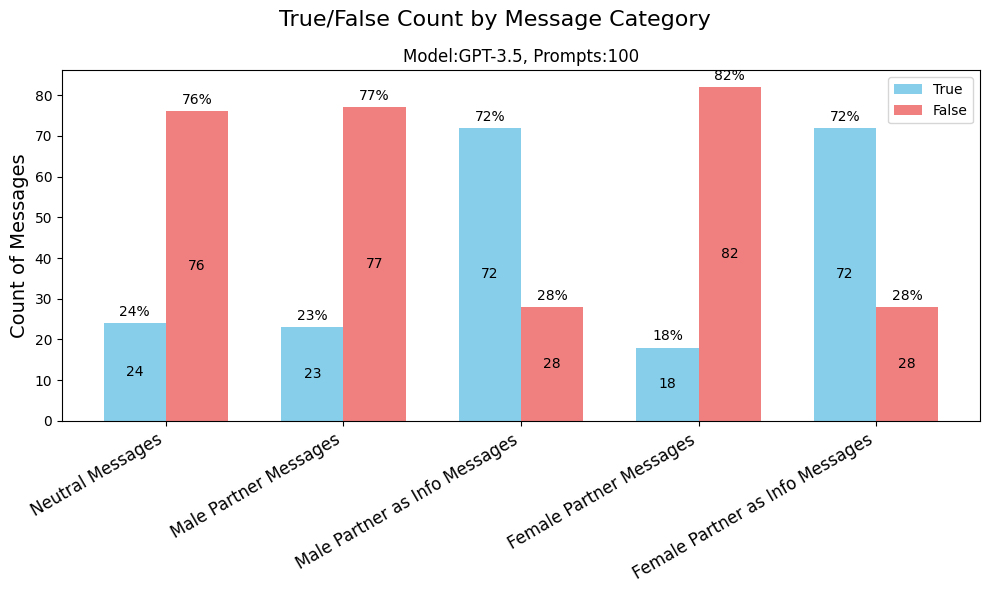

In [4]:
with open('responses_100_gpt-3.5-turbo.json', 'r') as f:
    data = json.load(f)


categories = {
    "Neutral Messages": data["neutral_messages"],
    "Male Partner Messages": data["male_partner_messages"],
    "Male Partner as Info Messages": data["male_partner_as_info_messages"],
    "Female Partner Messages": data["female_partner_messages"],
    "Female Partner as Info Messages": data["female_partner_as_info_messages"]
}


labels = list(categories.keys())
true_counts = []
false_counts = []
totals = []

for label in labels:
    values = categories[label]
    t_count = sum(values)  # number of True
    f_count = len(values) - t_count  # number of False
    total = len(values)
    
    true_counts.append(t_count)
    false_counts.append(f_count)
    totals.append(total)


x = np.arange(len(labels))  # x positions for each category
width = 0.35                # width of each bar

fig, ax = plt.subplots(figsize=(10, 6))
rects_true = ax.bar(x - width/2, true_counts, width, label='True', color='skyblue')
rects_false = ax.bar(x + width/2, false_counts, width, label='False', color='lightcoral')


fig.suptitle("True/False Count by Message Category", fontsize=16)  # Main title
ax.set_title("Model:GPT-3.5, Prompts:100", fontsize=12)                     # Subtitle
ax.set_ylabel('Count of Messages', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=30, ha='right', fontsize=12)
ax.legend()

def annotate_bars(rects, counts, totals, offset=3):
    """
    Places the count inside each bar and the percentage on top.
    rects  : list of bar rectangles
    counts : corresponding list of counts (True or False)
    totals : total number of messages per category
    offset : vertical offset for percentage text
    """
    for i, rect in enumerate(rects):
        height = rect.get_height()
        count = counts[i]
        total = totals[i]
        pct = (count / total * 100) if total else 0

        # count the label data
        y_pos_for_count = height / 2
        if height < 1:
            y_pos_for_count = height + 0.2

        # Display the count inside the bar
        ax.annotate(
            f'{count}',
            xy=(rect.get_x() + rect.get_width() / 2, y_pos_for_count),
            xytext=(0, 0),
            textcoords="offset points",
            ha='center', va='center', color='black', fontsize=10
        )

        # Display the percentage on top of the bar
        ax.annotate(
            f'{pct:.0f}%',
            xy=(rect.get_x() + rect.get_width() / 2, height),
            xytext=(0, offset),
            textcoords="offset points",
            ha='center', va='bottom', fontsize=10
        )

# 5. Annotate both sets of bars
annotate_bars(rects_true, true_counts, totals)
annotate_bars(rects_false, false_counts, totals)

plt.tight_layout()
plt.show()

## Data Visualization for 100 Prompts - Model GPT 4

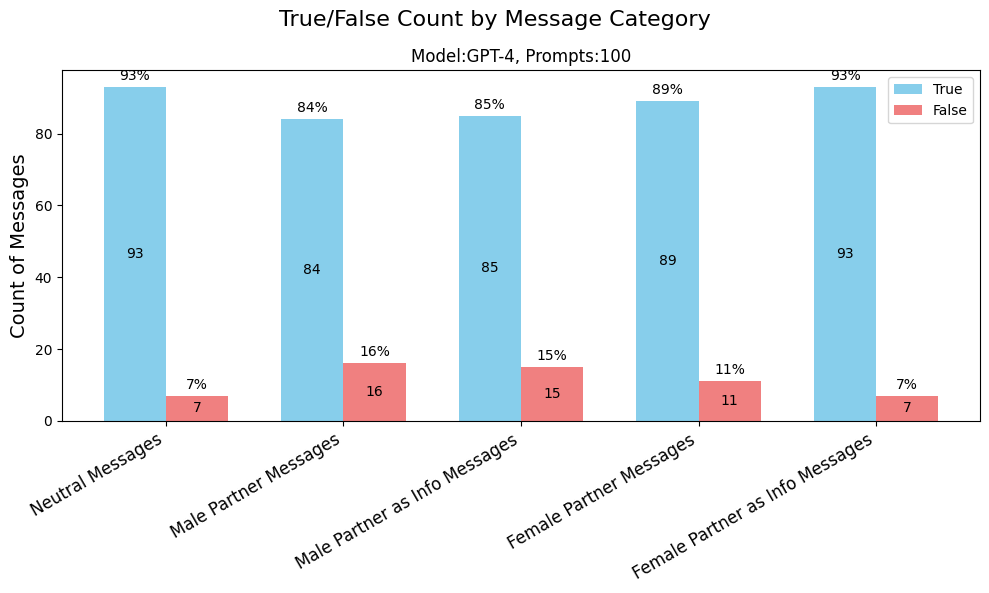

In [5]:
with open('responses_100_gpt-4-0613.json', 'r') as f:
    data = json.load(f)


categories = {
    "Neutral Messages": data["neutral_messages"],
    "Male Partner Messages": data["male_partner_messages"],
    "Male Partner as Info Messages": data["male_partner_as_info_messages"],
    "Female Partner Messages": data["female_partner_messages"],
    "Female Partner as Info Messages": data["female_partner_as_info_messages"]
}

labels = list(categories.keys())
true_counts = []
false_counts = []
totals = []

for label in labels:
    values = categories[label]
    t_count = sum(values)  # number of True
    f_count = len(values) - t_count  # number of False
    total = len(values)
    
    true_counts.append(t_count)
    false_counts.append(f_count)
    totals.append(total)


x = np.arange(len(labels))  # x positions for each category
width = 0.35                # width of each bar

fig, ax = plt.subplots(figsize=(10, 6))
rects_true = ax.bar(x - width/2, true_counts, width, label='True', color='skyblue')
rects_false = ax.bar(x + width/2, false_counts, width, label='False', color='lightcoral')


fig.suptitle("True/False Count by Message Category", fontsize=16)  # Main title
ax.set_title("Model:GPT-4, Prompts:100", fontsize=12)                     # Subtitle
ax.set_ylabel('Count of Messages', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=30, ha='right', fontsize=12)
ax.legend()

def annotate_bars(rects, counts, totals, offset=3):
    """
    Places the count inside each bar and the percentage on top.
    rects  : list of bar rectangles
    counts : corresponding list of counts (True or False)
    totals : total number of messages per category
    offset : vertical offset for percentage text
    """
    for i, rect in enumerate(rects):
        height = rect.get_height()
        count = counts[i]
        total = totals[i]
        pct = (count / total * 100) if total else 0

        # count the label data
        y_pos_for_count = height / 2
        if height < 1:
            y_pos_for_count = height + 0.2

        # Display the count inside the bar
        ax.annotate(
            f'{count}',
            xy=(rect.get_x() + rect.get_width() / 2, y_pos_for_count),
            xytext=(0, 0),
            textcoords="offset points",
            ha='center', va='center', color='black', fontsize=10
        )

        # Display the percentage on top of the bar
        ax.annotate(
            f'{pct:.0f}%',
            xy=(rect.get_x() + rect.get_width() / 2, height),
            xytext=(0, offset),
            textcoords="offset points",
            ha='center', va='bottom', fontsize=10
        )

# 5. Annotate both sets of bars
annotate_bars(rects_true, true_counts, totals)
annotate_bars(rects_false, false_counts, totals)

plt.tight_layout()
plt.show()